In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tools as tool

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/richard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("DataSet/teste_indicium_precificacao.csv")

PROCESSO DE ANÁLIDE EXPLORATÓRIA DOS DADOS

In [4]:
data

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [6]:
data.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [7]:
irrelevant_columns = ['id', 'host_id', 'host_name', 'ultima_review']

In [8]:
data.drop(columns = irrelevant_columns, inplace = True)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

nome                             0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [11]:
data.bairro.value_counts()

bairro
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1943
Hell's Kitchen        1531
                      ... 
Eltingville              2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [12]:
data.bairro_group.value_counts()

bairro_group
Manhattan        16628
Brooklyn         16444
Queens            4574
Bronx              876
Staten Island      314
Name: count, dtype: int64

In [13]:
data.room_type.value_counts()

room_type
Entire home/apt    20327
Private room       17663
Shared room          846
Name: count, dtype: int64

In [14]:
data.nome.value_counts()

nome
Home away from home                             12
Loft Suite @ The Box House Hotel                11
Private Room                                    10
Brooklyn Apartment                               9
New york Multi-unit building                     8
                                                ..
Sunny Duplex in Brooklyn's Best Area             1
Private room in Charming, Cozy and Sunny Apt     1
2 Bedroom next to Prospect Park!                 1
Lovely apartment as home                         1
Cozy Private Room in Bushwick, Brooklyn          1
Name: count, Length: 38268, dtype: int64

In [15]:
data = tool.hot_encoding(['bairro_group', 'room_type'], data)

In [16]:
data

,nome,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
3,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
4,Large Cozy 1 BR Apartment In Midtown East,Murray Hill,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0
5,BlissArtsSpace!,Bedford-Stuyvesant,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,Lovely Privet Bedroom with Privet Restroom,Upper East Side,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,1,0,0,0,1,0
48789,No.2 with queen size bed,Flushing,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,0,1,0,0,1,0
48798,Seas The Moment,Great Kills,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,0,0,1,0,1,0
48804,1B-1B apartment near by Metro,Mott Haven,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,0,0,0,1,0,0


In [17]:
data = tool.target_encoding('bairro', 'price', data)

In [18]:
data

,nome,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_encoded
0,Skylit Midtown Castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,267.583164
2,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,176.158333
3,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,132.753178
4,Large Cozy 1 BR Apartment In Midtown East,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,218.083601
5,BlissArtsSpace!,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0,105.958930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,Lovely Privet Bedroom with Privet Restroom,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,1,0,0,0,1,0,167.303203
48789,No.2 with queen size bed,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,0,1,0,0,1,0,83.837466
48798,Seas The Moment,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,0,0,1,0,1,0,100.600000
48804,1B-1B apartment near by Metro,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,0,0,0,1,0,0,80.716981


In [19]:
data['nome'] = data['nome'].apply(tool.filter_text)

In [20]:
data

,nome,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_encoded
0,skylit midtown castle,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,267.583164
2,cozy entire floor brownstone,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,176.158333
3,entire apt spacious studioloft central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,132.753178
4,large cozy br apartment midtown east,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,218.083601
5,blissartsspace,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0,105.958930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,lovely privet bedroom privet restroom,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,1,0,0,0,1,0,167.303203
48789,queen size bed,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,0,1,0,0,1,0,83.837466
48798,seas moment,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,0,0,1,0,1,0,100.600000
48804,bb apartment near metro,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,0,0,0,1,0,0,80.716981


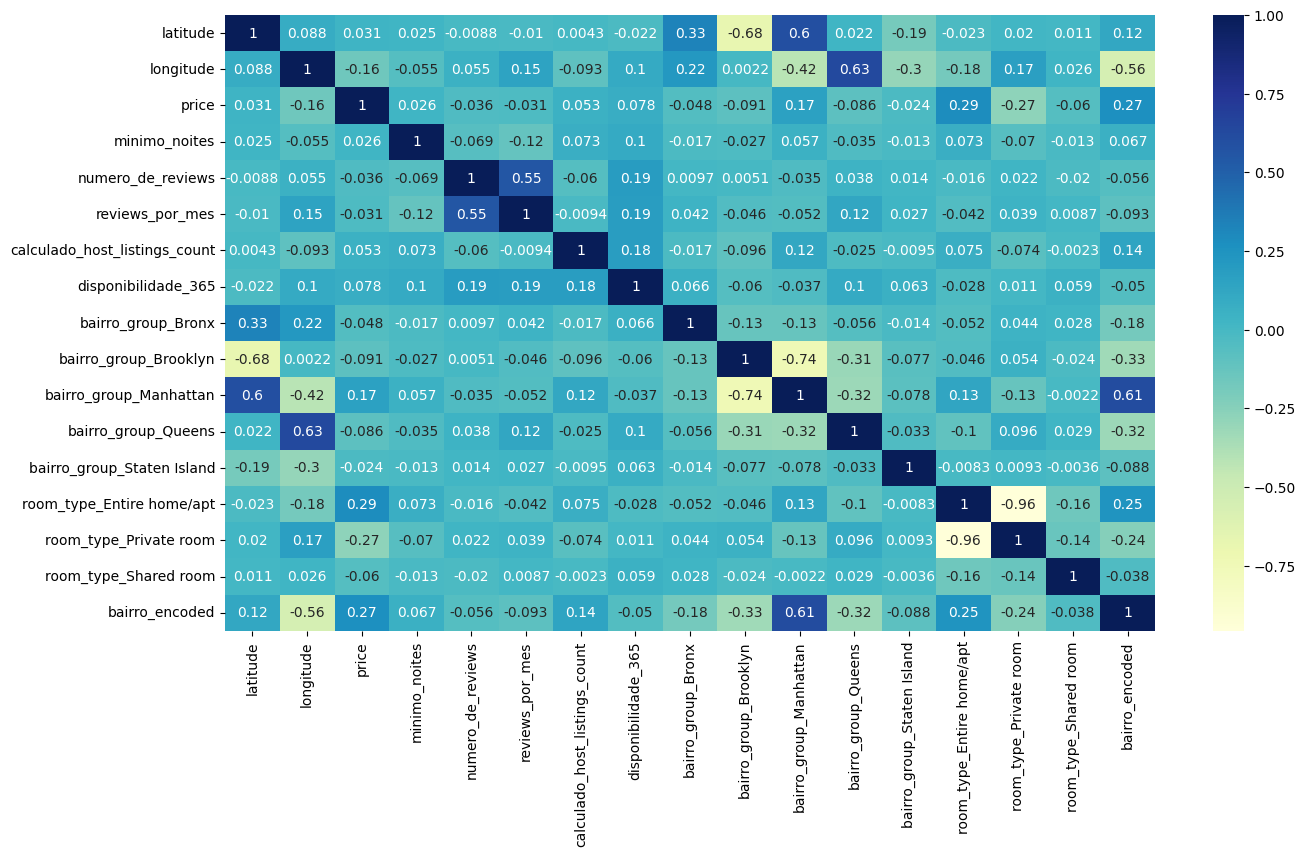

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(columns=['nome']).corr(), annot = True, cmap="YlGnBu")

plt.savefig("heatmap_output.svg")

In [22]:
matriz_tfidf = tool.tf_idf(data, 'nome')

In [23]:
matriz_tfidf

,amazing,apartment,apt,astoria,bath,bathroom,beautiful,bed,bedroom,best,...,suite,sunny,times,train,upper,view,village,west,williamsburg,york
0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.36128,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.320014,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.476036,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48789,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48798,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48804,0.0,0.592717,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
correlations = matriz_tfidf.corrwith(data['price'])

sorted_correlations = correlations.abs().sort_values(ascending=False)

In [25]:
sorted_correlations.head(n=12)

room        0.158119
luxury      0.099038
private     0.084328
loft        0.069488
cozy        0.069446
br          0.069092
village     0.061624
duplex      0.055309
midtown     0.054979
west        0.054524
bushwick    0.049341
chelsea     0.041398
dtype: float64

In [26]:
data.drop(columns=['nome'], inplace=True)

In [27]:
data

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_encoded
0,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,267.583164
2,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,176.158333
3,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,132.753178
4,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,218.083601
5,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,0,0,0,0,1,0,105.958930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,1,0,0,0,1,0,167.303203
48789,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,0,1,0,0,1,0,83.837466
48798,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,0,0,1,0,1,0,100.600000
48804,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,0,0,0,1,0,0,80.716981


In [28]:
processed_data = pd.concat([data, matriz_tfidf], axis=1)

In [29]:
processed_data

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,...,suite,sunny,times,train,upper,view,village,west,williamsburg,york
0,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,40.78099,-73.95366,129,1,1,1.00,1,147,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48789,40.75104,-73.81459,45,1,1,1.00,6,339,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48798,40.54179,-74.14275,235,1,1,1.00,1,87,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48804,40.80787,-73.92400,100,1,2,2.00,1,40,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DIVISÃO DE TREINO/TESTE E TREINAMENTO DO MODELO

In [30]:
from sklearn.model_selection import train_test_split

X = processed_data.drop(['price'], axis=1)
Y = processed_data['price']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
train_data = X_train.join(Y_train)

In [33]:
train_data

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,...,sunny,times,train,upper,view,village,west,williamsburg,york,price
47908,40.73681,-73.92024,2,2,2.00,2,188,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,80
37939,40.77768,-73.95064,31,1,0.27,33,338,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,150
21802,40.72778,-73.98936,4,2,0.08,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,95
29230,40.80638,-73.94415,3,29,1.79,2,235,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,180
6229,40.67565,-73.95121,2,37,0.67,7,325,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36776,40.71271,-73.99084,3,9,1.11,3,219,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,150
23555,40.72951,-73.99997,2,60,2.37,1,125,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.587052,0.0,0.0,0.0,150
13569,40.72774,-73.98211,2,3,0.07,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.650479,0.0,0.0,0.0,80
46531,40.76479,-73.98667,1,1,0.88,5,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,86


In [34]:
train_data['price'] = np.log1p(train_data['price'])

In [35]:
train_data['price']

47908    4.394449
37939    5.017280
21802    4.564348
29230    5.198497
6229     4.454347
           ...   
36776    5.017280
23555    5.017280
13569    4.394449
46531    4.465908
45665    8.922792
Name: price, Length: 31068, dtype: float64

VISUALIZAÇÃO DA DISTRIBUIÇÃO DOS PREÇOS

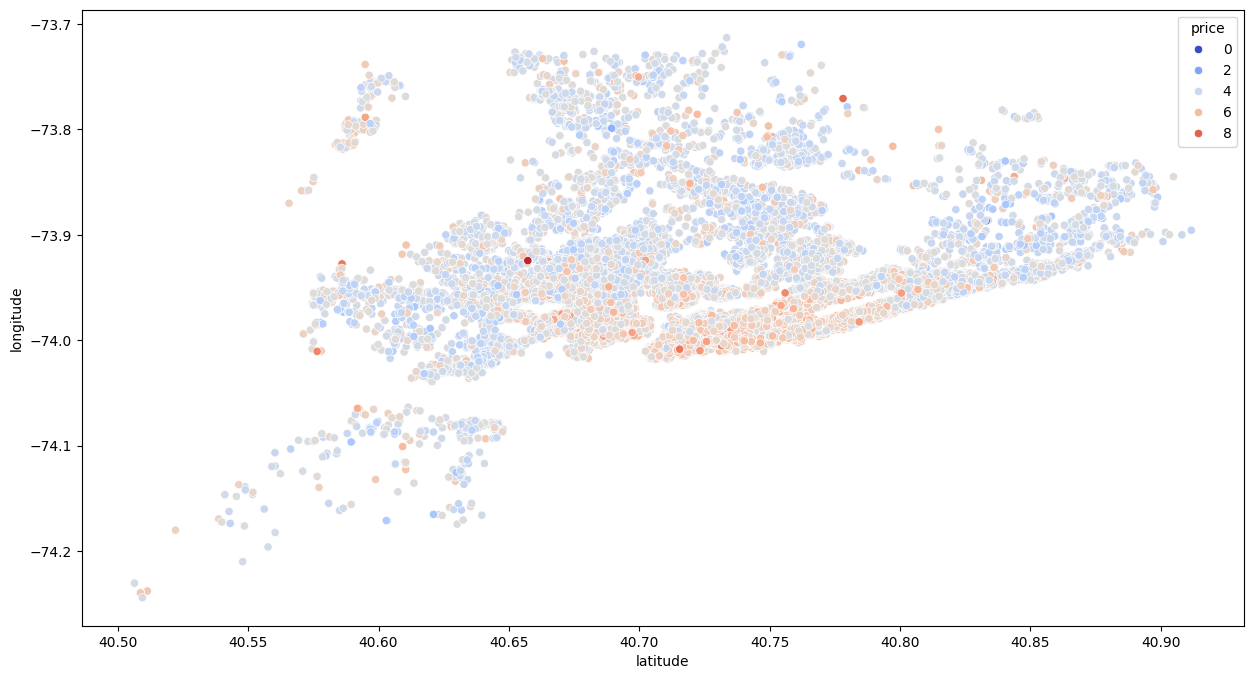

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="price", palette="coolwarm")

plt.savefig("scatterplot_output.png")

In [37]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['price'], axis = 1), train_data['price']
X_train_s = scaler.fit_transform(X_train)

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

with open("randomforestregressor.pkl", "wb") as file:
    pickle.dump(RandomForestRegressor, file=file)

In [38]:
test_data = X_test.join(Y_test)

In [39]:
test_data

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,...,sunny,times,train,upper,view,village,west,williamsburg,york,price
7967,40.72337,-73.99724,2,60,1.18,1,16,0,0,1,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,195
37792,40.77689,-73.90730,1,3,2.43,2,363,0,0,0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,60
36060,40.69952,-73.91868,30,1,0.45,17,342,0,1,0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,55
26377,40.73076,-74.00162,5,13,0.61,1,50,0,0,1,...,0.000000,0.00000,0.0,0.0,0.0,0.490893,0.0,0.0,0.0,245
25351,40.68838,-73.92208,2,10,0.51,2,34,0,1,0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,40.76551,-73.98315,29,3,0.27,1,358,0,0,1,...,0.000000,0.44294,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,189
36434,40.71849,-73.94165,3,6,0.80,1,6,0,1,0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,80
40152,40.71142,-73.94819,1,1,0.16,1,0,0,1,0,...,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,125
14987,40.67549,-73.98057,2,1,0.03,2,0,0,1,0,...,0.433723,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,85


In [40]:
test_data['price'] = np.log1p(test_data['price'])

In [41]:
test_data['price']

7967     5.278115
37792    4.110874
36060    4.025352
26377    5.505332
25351    3.828641
           ...   
29812    5.247024
36434    4.394449
40152    4.836282
14987    4.454347
16404    5.198497
Name: price, Length: 7768, dtype: float64

In [42]:
X_test, Y_test = test_data.drop(['price'], axis = 1), test_data['price']

In [43]:
X_test_s = scaler.transform(X_test)

In [44]:
forest.score(X_test_s, Y_test)

0.6291629124160221

In [46]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split" : [2,4,6,8],
    "max_depth": [None,4,8],
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring="neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
best_forest = grid_search.best_estimator_

In [48]:
RandomForestRegressor(max_features = 8, n_estimators = 30)

RandomForestRegressor(max_features=8, n_estimators=30)

In [49]:
best_forest.score(X_test_s, Y_test)

0.6539156892620726